# Chapter 17:  Quantum Kernels

For a quantum state $| \phi(\textbf{x}) \rangle|$ and $| \phi(\textbf{y}) \rangle|$, the inner product of two such  states is called a \index{quantum kernel} quantum kernel
\begin{equation}
k(\textbf{x},\textbf{y})=\langle \phi(\textbf{x}) | \phi(\textbf{y}) \rangle
\end{equation}
with a inner product
\begin{equation}
\langle\textbf{x} | \textbf{y} \rangle=\textbf{x}^T \cdot \textbf{y}.
\end{equation}

## Quantum Kernels and Swap Test

Example for two dimensional vectors

\begin{equation}
\textbf{x}=
\left( \begin{array}{c}
\sqrt{0.3} \\
\sqrt{0.7}\\
\end{array}
\right),~~~~
\textbf{y}=
\left( \begin{array}{c}
\sqrt{0.5} \\
\sqrt{0.5}\\
\end{array}
\right).
\end{equation}

\begin{equation}
k(\textbf{x},\textbf{y})= \langle \phi(\textbf{x} )|  \phi(\textbf{y})  \rangle = \langle\textbf{x} | \textbf{y} \rangle  \otimes     \langle\textbf{x} | \textbf{y} \rangle \otimes \langle \textbf{x} | \textbf{y} \rangle=  ( \textbf{x}^T \cdot \textbf{y})^3
\end{equation}


In [7]:
from qiskit import QuantumCircuit,QuantumRegister, Aer,execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate
from math import pi

In [8]:
qc = QuantumCircuit(7,1)
qc.h(6)
qc.barrier()
#ang = Sqrt[0.3]
#ArcCos[ang]*2
qc.ry(1.98231,0)
qc.ry(1.98231,1)
qc.ry(1.98231,2)
qc.h(3)
qc.h(4)
qc.h(5)
qc.barrier()
qc.cswap(6,0,3)
qc.cswap(6,1,4)
qc.cswap(6,2,5)
qc.h(6)
qc.measure(6,0)
qc.draw()

░ ┌────────────┐ ░                  
q_0: ──────░─┤ Ry(1.9823) ├─░──X───────────────
           ░ ├────────────┤ ░  │               
q_1: ──────░─┤ Ry(1.9823) ├─░──┼──X────────────
           ░ ├────────────┤ ░  │  │            
q_2: ──────░─┤ Ry(1.9823) ├─░──┼──┼──X─────────
           ░ └───┬───┬────┘ ░  │  │  │         
q_3: ──────░─────┤ H ├──────░──X──┼──┼─────────
           ░     ├───┤      ░  │  │  │         
q_4: ──────░─────┤ H ├──────░──┼──X──┼─────────
           ░     ├───┤      ░  │  │  │         
q_5: ──────░─────┤ H ├──────░──┼──┼──X─────────
     ┌───┐ ░     └───┘      ░  │  │  │ ┌───┐┌─┐
q_6: ┤ H ├─░────────────────░──■──■──■─┤ H ├┤M├
     └───┘ ░                ░          └───┘└╥┘
c: 1/════════════════════════════════════════╩═
                                             0

Circuit representing $k(\textbf{x},\textbf{y})=  ( \textbf{x}^T \cdot \textbf{y})^3$ with the swap test


Total count are: {'1': 631, '0': 9369}


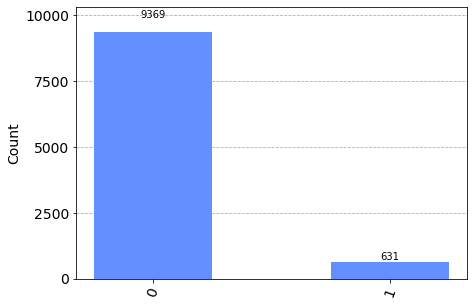

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(qc,simulator,shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)

plot_histogram(counts)

Using the swap test,  after 10000 shots we measure $p(|0 \rangle) = 0.9395$ with

\begin{equation}
  k(\textbf{x},\textbf{y}) =|   ( \textbf{x}^T \cdot \textbf{y})^3 | \approx \sqrt{  2 \cdot 0.9395-1}=0.93755. 
\end{equation}

## Quantum Kernels and Inversion Test

Quantum feature maps encodes classical data into quantum data  via a parametrized quantum circuit. Instead of coding the classical feature vector $\textbf{x}$ of dimension $z$ by amplitudes,  the feature vector defines by $z$ parameters of the  parametrized quantum circuit $U_{\phi(\textbf{x})}$ with $z \geq m$ 
\begin{equation}
 | \phi(\textbf{x}) \rangle =U_{\phi(\textbf{x})} |0 \rangle^{\otimes m} 
\end{equation}
with the dimension of $\phi(\textbf{x})$ being $2^m$.
Parameterized quantum circuits  based on superposition and entanglement are hard to simulate classically and could lead to an advantage over classical machine learning approaches.
The inversion test is based on the idea usual of estimating the fidelity (similarity) between two states.
For an input state $|0 \rangle^{\otimes m}$  if we map it by parametrized quantum circuit $U_{\phi(\textbf{x})}$  with parameters that are defined by $\textbf{x}$ and un-compute it by $U_{\phi(\textbf{x})} ^\dag$, the inverse if the parametrized quantum circuit $U_{\phi(\textbf{x})}$ the probability of measuring the state $|0 \rangle^{\otimes m}$  is one. If we represent the quantum circuit by a matrix $U_{\phi(\textbf{x})}$, the inverse quantum circuit represented as a matrix corresponds to the conjugate transpose  $U_{\phi(\textbf{x})} ^*$ also written as  $U_{\phi(\textbf{x})} ^\dag$.
If we parametrized quantum circuit $U$ by $\textbf{x}$  ( $U_{\phi(\textbf{x})}$) and inverse of the parametrized quantum $U^\dag$  by $\textbf{y}$ ($U_{\phi(\textbf{y})} ^\dag$ ) and  if $\textbf{x}$ and $\textbf{y}$ are similar, the probability of measuring  $|0 \rangle^{\otimes m}$  for the input  $|0 \rangle^{\otimes m}$  should be near $1$,
\begin{equation}
 U_{\phi(\textbf{y})} ^\dag   U_{\phi(\textbf{x})} |0^{\otimes m}  \rangle 
\end{equation}
If $\textbf{x}$ and $\textbf{y}$ differ a lot, this probability is smaller. The quantum kernel is represented as
\begin{equation}
k(\textbf{x},\textbf{y})=|\langle \phi(\textbf{x}) | \phi(\textbf{y}) \rangle|^2=|  \langle  0^{\otimes m} | U_{\phi(\textbf{y})} ^\dag | U_{\phi(\textbf{x})} |0^{\otimes m}  \rangle |^2
\end{equation}
We measure the final 
state several times and record the number 
of $|0^{\otimes m} \rangle$ and estimate the value $k(\textbf{x},\textbf{y})$.

With the same $\textbf{x}$,$\textbf{y}$ as in the preceding example using the  \textit{qiskit}  parameterized quantum circuit $U_{\phi(\textbf{x})}=ZZFeatureMap$ where the parameter are defined by the data by the command $bind\_parameters$ 

In [10]:
import math
from qiskit.circuit.library import ZZFeatureMap
from math import pi
from qiskit.circuit.library import RealAmplitudes
import numpy as np

In [11]:
data = [np.sqrt(0.3), np.sqrt(0.7)]
feature_map = ZZFeatureMap(2, reps=1)
feature_map = feature_map.assign_parameters(data) # <== here

data2 = [np.sqrt(0.5), np.sqrt(0.5)]
feature_map2 = ZZFeatureMap(2, reps=1).inverse()
feature_map2 = feature_map2.assign_parameters(data2) # <== here


qc = QuantumCircuit(2)
qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(feature_map2, inplace=True)

qc.decompose().draw(fold=180)

┌───┐┌───────────┐                        ░                         ┌────────────┐┌───┐
q_0: ┤ H ├┤ P(1.0954) ├──■─────────────────■───░───■──────────────────■──┤ P(-1.4142) ├┤ H ├
     ├───┤├───────────┤┌─┴─┐┌───────────┐┌─┴─┐ ░ ┌─┴─┐┌────────────┐┌─┴─┐├────────────┤├───┤
q_1: ┤ H ├┤ P(1.6733) ├┤ X ├┤ P(11.957) ├┤ X ├─░─┤ X ├┤ P(-11.853) ├┤ X ├┤ P(-1.4142) ├┤ H ├
     └───┘└───────────┘└───┘└───────────┘└───┘ ░ └───┘└────────────┘└───┘└────────────┘└───┘

Circuit representing $U_{\phi(\textbf{y})} ^\dag   U_{\phi(\textbf{x})} |0^{\otimes 2}  \rangle$ using the  \textit{qiskit}  parameterized quantum circuit $U_{\phi(\textbf{x})}=ZZFeatureMap$


Total count are: {'00': 0.955955238600588, '01': 0.024745599013005, '10': 0.016292876362375, '11': 0.003006286024032}


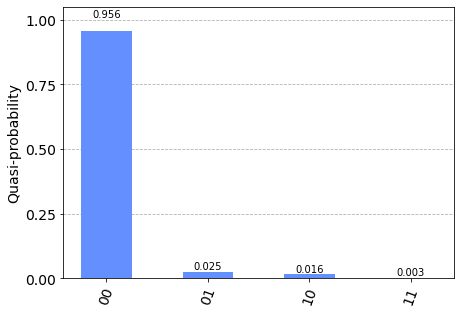

In [12]:
simulator = Aer.get_backend('statevector_simulator')
result=execute(qc,simulator).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

After $10000$ shots we measure $p(|00 \rangle)=  0.956$ with

\begin{equation}
k(\textbf{x},\textbf{y})=|  \langle  0^{\otimes m} | U_{\phi(\textbf{y})} ^\dag | U_{\phi(\textbf{x})} |0^{\otimes m}  \rangle |^2= 0.956.
\end{equation}
